<a href="https://colab.research.google.com/github/mqquiroz/ICV513/blob/main/Animacion_Onda_Estacionaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#librerias
import numpy as np #operaciones matemáticas
import matplotlib.pyplot as plt #libreria para gráficar
from matplotlib import animation # libreria para animaciones
from IPython.display import HTML # libreria necesaria para mostrar las animaciones en google colab
import matplotlib as mpl

#Función para resolver la ecuación de dispersión, con entrada de h (profundidad) y T (periodo). Resultado: Celeridad
def dispersion(h,T,tol=1e-4):
  g = 9.81 #gravedad (m/s2)
  delta_c = 0.0001
  f = 1/T
  C = np.sqrt(g*h)
  while True:
    k = 2*np.pi*f/C
    C = np.sqrt(g/k*np.tanh(k*h))
    if delta_c*k/(2*np.pi*f) <= tol:
      break
  return C

## Ejercicio

Animar una onda progresiva (durante 10 segundos) de periodo $T= 20$ (s), Altura de onda $H = 2$ (m) y una profundidad de $h = 50$ (m). Considere en el eje $x$ cuatro longitudes de onda ($4L$).

In [2]:
#Datos
H = 2  #altura de onda (m)
h = 50 #profundidad (m)
T = 20 #periodo (s)

C = dispersion(h,T) # Celeridad (m/s)
L = C*T #Longitud de onda (m)
k = 2*np.pi/L #número de onda (1/m)
omega = 2*np.pi/T #frecuencia angular (rad/s)

In [3]:
#lista
x = [1,2,3,4,5]
x = np.array(x)
x

array([1, 2, 3, 4, 5])

In [4]:
#un Array (vector fila)
x = np.arange(1,5+0.5,0.5)  #np.arange(inicio,final+incremento,incremento)
x

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [5]:
x = np.linspace(1,5,9) #np.linspace(inicio,final,nro de elementos)
x

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [6]:
dx = 0.1 #(m) incremnto espacial en eje x
#crear vector del eje x de 0 a 4L
x = np.arange(0,4*L+dx,dx) #valores a lo largo del eje x

t_total = 10 #(s) tiempo total de animación

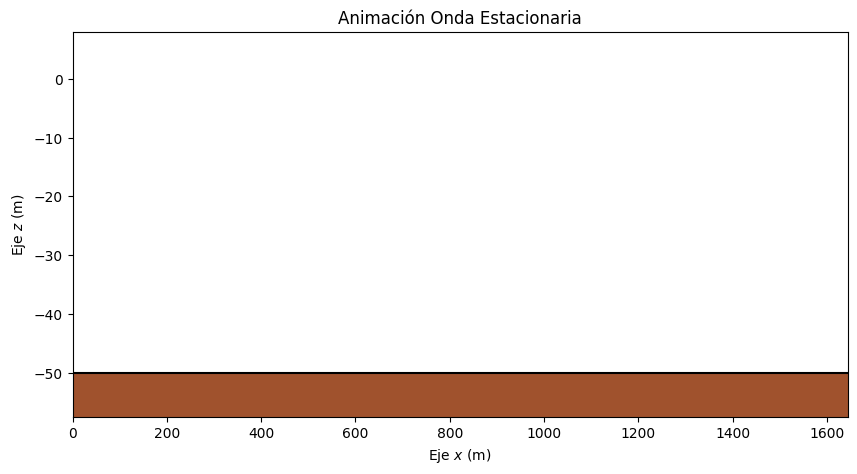

In [7]:
# Crearemos la figura a nuestra necesidad (antojo)
ancho = 10
alto  = 5

#Declaramos figura (fig) y eje (ax) 
fig, ax = plt.subplots(figsize=(ancho,alto))

#Definir cosas que no se mueven (estáticas)
ax.set_xlabel('Eje $x$ (m)')
ax.set_ylabel('Eje $z$ (m)')
ax.set_title('Animación Onda Estacionaria')
ax.set_xlim(x[0],x[-1])
ax.set_ylim(-1.15*h,4*H)
ax.axhline(y=-h, color='k')
ax.fill_between(x,-1.15*h,-h,color='sienna')

In [8]:
#Definimos las cosas animadas
line, = ax.plot([],[],linewidth=1.0,color='k')
time_text = ax.text(0.25*L,2*H,'',fontsize=15)
water = ax.fill_between(x,-h,np.ones(len(x)),color='dodgerblue')

def animate(t):
  eta_i = (H/2)*np.cos(k*x-omega*t)
  eta_r = (H/2)*np.cos(k*x+omega*t)
  eta_s = eta_i + eta_r
  time_text.set_text('tiempo = %0.0f (s)' % (t,))
  line.set_data(x,eta_s)
  #modificamos eta en la superficie libre
  path_water = water.get_paths()[0]
  path_water.vertices[np.size(x)+1:2*np.size(x)+1, 1] = eta_s[::-1]
  path_water.vertices[0, 1] = eta_s[0]
  path_water.vertices[-1, 1] = eta_s[0]
  return line,time_text

anim = animation.FuncAnimation(fig,animate,frames=t_total+1,interval=100,blit=False)
#anim.save('Onda_Progresiva.mp4',dpi=300)

HTML(anim.to_jshtml())